In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
info_job_level_dfs = {}
info_job_level_dfs["gpu_utilization"] = pd.read_csv("job_level_gpu_utilization.csv")

gputil_all = info_job_level_dfs["gpu_utilization"]

/tmp/ipykernel_369702/1042970439.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jobs_per_bin_utilization = gputil_all.groupby('utilization_bin').size()


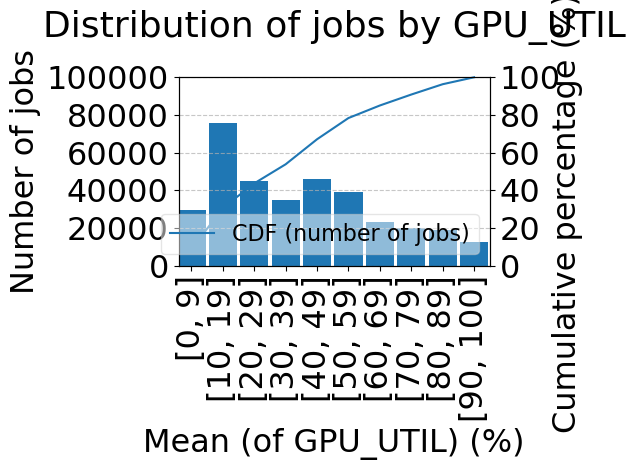

In [3]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
bin_labels = [f"[{bins[i]}, {bins[i+1] - 1}]" for i in range(len(bins) - 1)]

gputil_all['utilization_bin'] = pd.cut(
    gputil_all['mean_utilization'], 
    bins=bins, 
    labels=bin_labels, 
    right=False 
)

jobs_per_bin_utilization = gputil_all.groupby('utilization_bin').size()

jobs_per_bin_utilization = jobs_per_bin_utilization.reindex(bin_labels, fill_value=0)

cumulative_jobs_utilization = jobs_per_bin_utilization.cumsum()
total_jobs_utilization = cumulative_jobs_utilization.iloc[-1]
cdf_utilization = (cumulative_jobs_utilization / total_jobs_utilization) * 100

fig, ax1 = plt.subplots()

ax1.bar(range(len(bin_labels)), jobs_per_bin_utilization, tick_label=bin_labels,
        label='Number of jobs', width=0.9)
ax1.set_xlabel('Mean (of GPU_UTIL) (%)', fontsize=23)
ax1.set_ylabel('Number of jobs', fontsize=23)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.tick_params(axis='x', rotation=90, labelsize=23)
ax1.tick_params(axis='y', labelsize=23)
ax1.set_xlim(-0.41, len(bin_labels) - 0.5)

ax1.set_ylim(0, 100000)
ax1.set_yticks([0, 20000, 40000, 60000, 80000, 100000])

ax2 = ax1.twinx()
ax2.plot(range(len(bin_labels)), cdf_utilization, label='CDF (number of jobs)', clip_on=False)
ax2.set_ylabel('Cumulative percentage (%)', fontsize=23)
ax2.yaxis.set_label_coords(1.2, 0.28)

ax2.set_ylim(0, 100) 
ax2.set_yticks([0, 20, 40, 60, 80, 100])
ax2.tick_params(axis='y', labelsize=23)
plt.legend(loc="lower right", fontsize=16, framealpha=0.5)

plt.title("Distribution of jobs by GPU_UTIL", fontsize=26, pad=29)
plt.tight_layout()
plt.show()

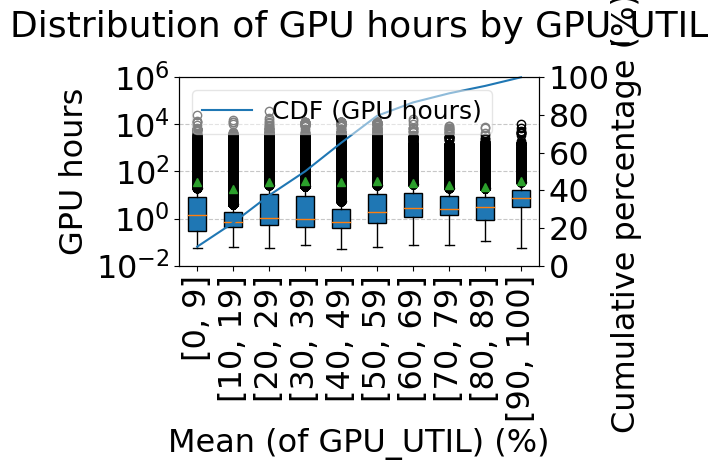

In [4]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
bin_labels = [f"[{bins[i]}, {bins[i+1] - 1}]" for i in range(len(bins) - 1)]

gputil_all['utilization_bin'] = pd.cut(
    gputil_all['mean_utilization'], 
    bins=bins, 
    labels=bin_labels, 
    right=False  
)

boxplot_data_gpu_hours = [
    gputil_all.loc[gputil_all['utilization_bin'] == label, 'gpu_hours'].dropna()
    for label in bin_labels
]

gpu_hours_per_bin = [data.sum() for data in boxplot_data_gpu_hours]
cumulative_gpu_hours = np.cumsum(gpu_hours_per_bin)
total_gpu_hours = cumulative_gpu_hours[-1]
cdf_gpu_hours = (cumulative_gpu_hours / total_gpu_hours) * 100

fig, ax1 = plt.subplots()

ax1.boxplot(
    boxplot_data_gpu_hours, 
    labels=bin_labels, 
    patch_artist=True, 
    showfliers=True, 
    showmeans=True,
    # boxprops=dict(facecolor=colors[2]),
    # meanprops=dict(marker=markers[1], markerfacecolor=colors[5], markeredgecolor=colors[5]),
)
ax1.set_xlabel('Mean (of GPU_UTIL) (%)', fontsize=23)
ax1.set_ylabel('GPU hours', fontsize=23)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.tick_params(axis='x', rotation=90)
ax1.set_yscale('log')
ax1.set_ylim(0.01, 1000000)
ax1.set_yticks([0.01, 1, 100, 10000, 1000000])
ax1.tick_params(axis='y', labelsize=23)
ax1.tick_params(axis='x', labelsize=23)

ax2 = ax1.twinx()
ax2.plot(
    range(1, len(bin_labels) + 1), 
    cdf_gpu_hours, 
    # color=colors[0], 
    # marker=markers[2], 
    label='CDF (GPU hours)',
    clip_on=False
)
ax2.set_ylabel('Cumulative percentage (%)', fontsize=23)
ax2.yaxis.set_label_coords(1.2, 0.28)
ax2.set_ylim(0, 100)  
ax2.set_yticks([0, 20, 40, 60, 80, 100])
ax2.tick_params(axis='y', labelsize=23)

plt.legend(loc="upper left", fontsize=18, framealpha=0.5)
plt.title("Distribution of GPU hours by GPU_UTIL", fontsize=26, pad=29)
plt.tight_layout()
plt.show()